<a href="https://colab.research.google.com/github/javajerry/Algorithm-Trading/blob/main/GOOG_StockPred_ML_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Description: This program predicts the price of Google stock for a specific data

In [3]:
#Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [6]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving GOOG.csv to GOOG.csv


In [7]:
#Store and look at the data
df = pd.read_csv('GOOG.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-01,1188.050049,1188.050049,1167.180054,1168.079956,1168.079956,2639200
1,2019-05-02,1167.760010,1174.189941,1155.001953,1162.609985,1162.609985,1944800
2,2019-05-03,1173.650024,1186.800049,1169.000000,1185.400024,1185.400024,1980700
3,2019-05-06,1166.260010,1190.849976,1166.260010,1189.390015,1189.390015,1563900
4,2019-05-07,1180.469971,1190.439941,1161.040039,1174.099976,1174.099976,1551400
5,2019-05-08,1172.010010,1180.423950,1165.739990,1166.270020,1166.270020,1309300
6,2019-05-09,1159.030029,1169.660034,1150.849976,1162.380005,1162.380005,1185700
7,2019-05-10,1163.589966,1172.599976,1142.500000,1164.270020,1164.270020,1314500
8,2019-05-13,1141.959961,1147.939941,1122.109985,1132.030029,1132.030029,1860600
9,2019-05-14,1137.209961,1140.420044,1119.550049,1120.439941,1120.439941,1836600


In [11]:
#get and print the last row of data
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
20,2019-05-30,1115.540039,1123.130005,1112.119995,1117.949951,1117.949951,951900


In [12]:
#Prepare the data for training
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-01,1188.050049,1188.050049,1167.180054,1168.079956,1168.079956,2639200
1,2019-05-02,1167.760010,1174.189941,1155.001953,1162.609985,1162.609985,1944800
2,2019-05-03,1173.650024,1186.800049,1169.000000,1185.400024,1185.400024,1980700
3,2019-05-06,1166.260010,1190.849976,1166.260010,1189.390015,1189.390015,1563900
4,2019-05-07,1180.469971,1190.439941,1161.040039,1174.099976,1174.099976,1551400
5,2019-05-08,1172.010010,1180.423950,1165.739990,1166.270020,1166.270020,1309300
6,2019-05-09,1159.030029,1169.660034,1150.849976,1162.380005,1162.380005,1185700
7,2019-05-10,1163.589966,1172.599976,1142.500000,1164.270020,1164.270020,1314500
8,2019-05-13,1141.959961,1147.939941,1122.109985,1132.030029,1132.030029,1860600
9,2019-05-14,1137.209961,1140.420044,1119.550049,1120.439941,1120.439941,1836600


In [31]:
#Create an empty to store the independent and dependent data
days = list()
adj_close_prices = list()

In [32]:
df_days = df.loc[:,'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [33]:
# Create the independent data set
for day in df_days:
  days.append([int(day.split('-')[2])] )

# Create the dependent data set
for adj_close_price in df_adj_close:
  adj_close_prices.append(float(adj_close_price))


In [34]:
#Create the 3 Support Vector Regression Models

#Create and train a SVR model using a linear kernel
lin_svr = SVR(kernel='linear',C=1000.0)
lin_svr.fit(days, adj_close_prices)

#Create and train a SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly',C=1000.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

#Create and train a SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf',C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

print('done')

done


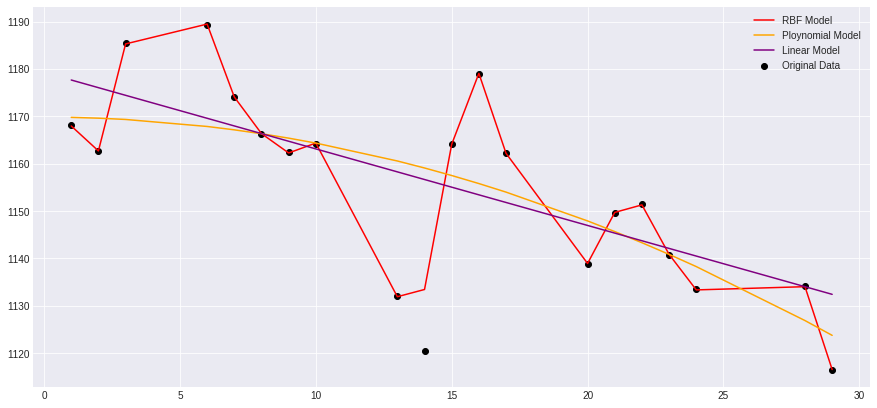

In [36]:
#Plot the models on a graph to see which has the better fit to the original data
plt.figure(figsize=(15,7))
plt.scatter(days, adj_close_prices, color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='red', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label='Ploynomial Model')
plt.plot(days, lin_svr.predict(days), color='purple', label='Linear Model')
plt.legend()
plt.show()

#output shows rbf is best fit

In [37]:
# Show the predicted price for the given day
day = [[30]]

print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [1112.94098222]
The Linear SVR predicted: [1130.8180244]
The Polynomial SVR predicted: [1120.54296392]


In [39]:
#Print the actual price
print('The actual price: ', actual_price['Adj Close'][20])

The actual price:  1117.949951
